In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-movies-on-netflix/100 Best Movies on Netflix.csv
/kaggle/input/best-movies-on-netflix/100 Best Movies on Netflix.xlsx


In [149]:
df_original = pd.read_csv(os.path.join(dirname, filenames[0]))

In [120]:
df = pd.DataFrame(df_original)

In [36]:
df.shape

(100, 7)

In [41]:
df.head()

,Rank,Movie Title,Year,Score,Director,Cast,Critics Consensus
0,1,His House,2020,100,Remi Weekes,"Wunmi Mosaku, Sope Dirisu, Matt Smith, Cornell...",Featuring genuine scares through every corrido...
1,2,How to Train Your Dragon,2010,99,Christopher Sanders,"Jay Baruchel, Gerard Butler, America Ferrera, ...","Boasting dazzling animation, a script with sur..."
2,3,The Forty-Year-Old Version,2020,99,Radha Blank,"Welker White, Reed Birney, Radha Blank, Peter Kim",The Forty-Year-Old Version opens a compelling ...
3,4,Under the Shadow,2016,99,Babak Anvari,"Narges Rashidi, Avin Manshadi, Bobby Naderi, R...",Under the Shadow deftly blends seemingly dispa...
4,5,Monty Python and the Holy Grail,1975,98,Terry Gilliam,"Graham Chapman, John Cleese, Terry Gilliam, Er...",A cult classic as gut-bustingly hilarious as i...


/tmp/ipykernel_34/47044544.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),annot=True, annot_kws={"fontsize":15})


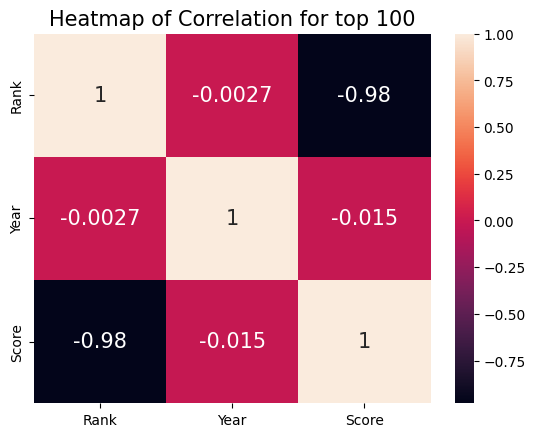

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(df.corr(),annot=True, annot_kws={"fontsize":15})

plt.title('Heatmap of Correlation for top 100', fontsize=15)
plt.show() 

In [61]:
df['Director'].value_counts()

Peter Jackson        3
Sam Raimi            2
Noah Baumbach        2
Kathryn Bigelow      2
Sam Mendes           2
                    ..
Maggie Gyllenhaal    1
Bennett Miller       1
Todd Haynes          1
Jane Campion         1
John Stevenson       1
Name: Director, Length: 90, dtype: int64

In [46]:
df['Director'].nunique()

90

<AxesSubplot: ylabel='Director'>

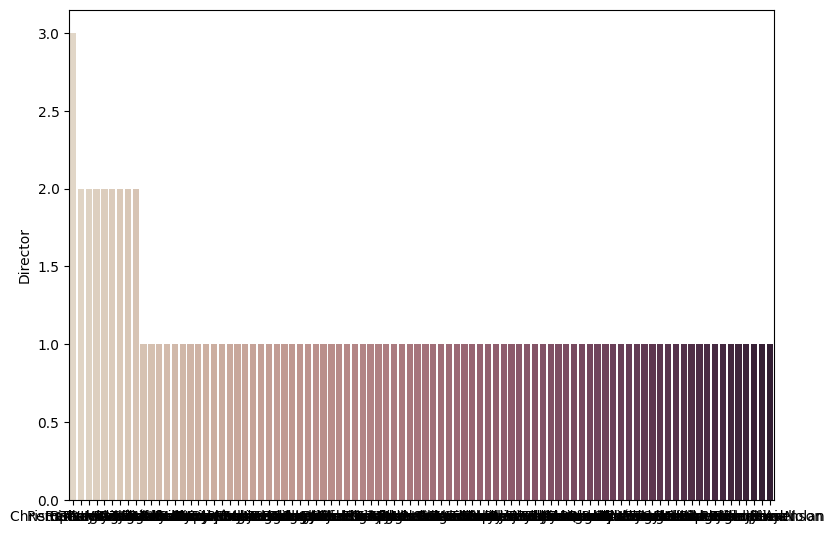

In [55]:
fig = plt.figure(figsize=(20,14))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(x=df['Director'].unique(), y=df['Director'].value_counts(), palette="ch:.25")

In [135]:
for i in df['Rank']:
    if i <=10:
        df.loc[i-1, 'Top'] = "Up to 10"
    elif i >10 and i <=50:
        df.loc[i-1, 'Top'] = "Up to 50"
    else:
        df.loc[i-1, 'Top'] = "Up to 100"

In [152]:
df['Cast'] = df_original['Cast']

<AxesSubplot: xlabel='Year', ylabel='Score'>

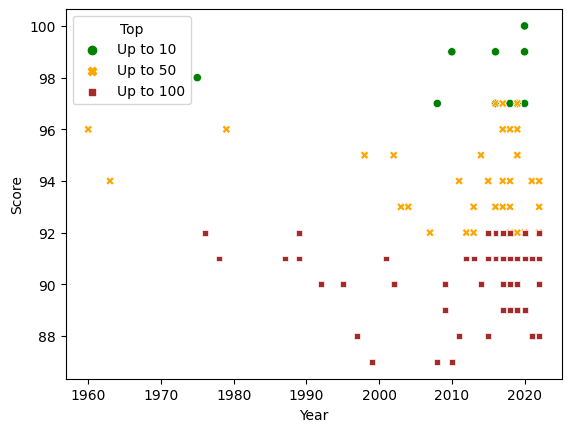

In [137]:
sns.scatterplot(data=df, x='Year', y='Score',hue = 'Top', palette = ['green','orange','brown'],style = 'Top')
#plt.legend(labels=['Up to 10', 'Up to 50','Up to 100'])

In [153]:
df

,Rank,Movie Title,Year,Score,Director,Cast,Critics Consensus,Top
0,1,His House,2020,100,Remi Weekes,"Wunmi Mosaku, Sope Dirisu, Matt Smith, Cornell...",Featuring genuine scares through every corrido...,Up to 10
1,2,How to Train Your Dragon,2010,99,Christopher Sanders,"Jay Baruchel, Gerard Butler, America Ferrera, ...","Boasting dazzling animation, a script with sur...",Up to 10
2,3,The Forty-Year-Old Version,2020,99,Radha Blank,"Welker White, Reed Birney, Radha Blank, Peter Kim",The Forty-Year-Old Version opens a compelling ...,Up to 10
3,4,Under the Shadow,2016,99,Babak Anvari,"Narges Rashidi, Avin Manshadi, Bobby Naderi, R...",Under the Shadow deftly blends seemingly dispa...,Up to 10
4,5,Monty Python and the Holy Grail,1975,98,Terry Gilliam,"Graham Chapman, John Cleese, Terry Gilliam, Er...",A cult classic as gut-bustingly hilarious as i...,Up to 10
...,...,...,...,...,...,...,...,...
95,96,Fear Street Part Three: 1666,2021,88,Leigh Janiak,"Kiana Madeira, Ashley Zukerman, Gillian Jacobs...",Fear Street Part Three: 1666 sends the slasher...,Up to 100
96,97,Donnie Brasco,1997,88,Mike Newell,"Al Pacino, Johnny Depp, Michael Madsen, Bruno ...","A stark, nuanced portrait of life in organized...",Up to 100
97,98,Inception,2010,87,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Smart, innovative, and thrilling, Inception is...",Up to 100
98,99,American Beauty,1999,87,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes...","Flawlessly cast and brimming with dark, acid w...",Up to 100


In [156]:
for i in range(len(df['Cast'])):
    df['Cast'][i] = df['Cast'][i].split(',')

/tmp/ipykernel_34/2285825177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cast'][i] = df['Cast'][i].split(',')


In [165]:
df_original['Cast'].nunique()

98

In [180]:
l_cast = []
for i in range(len(df['Cast'])):
    for j in (df['Cast'][i]):
        l_cast.append(j)

In [190]:
print(len(l_cast), len(set(l_cast)))

399 367


In [197]:
from collections import Counter
u_cast = Counter(l_cast)

In [211]:
u_cast_number = []
for i in set(l_cast):
    u_cast_number.append(l_cast.count(i))

In [ ]:
set(l_cast)

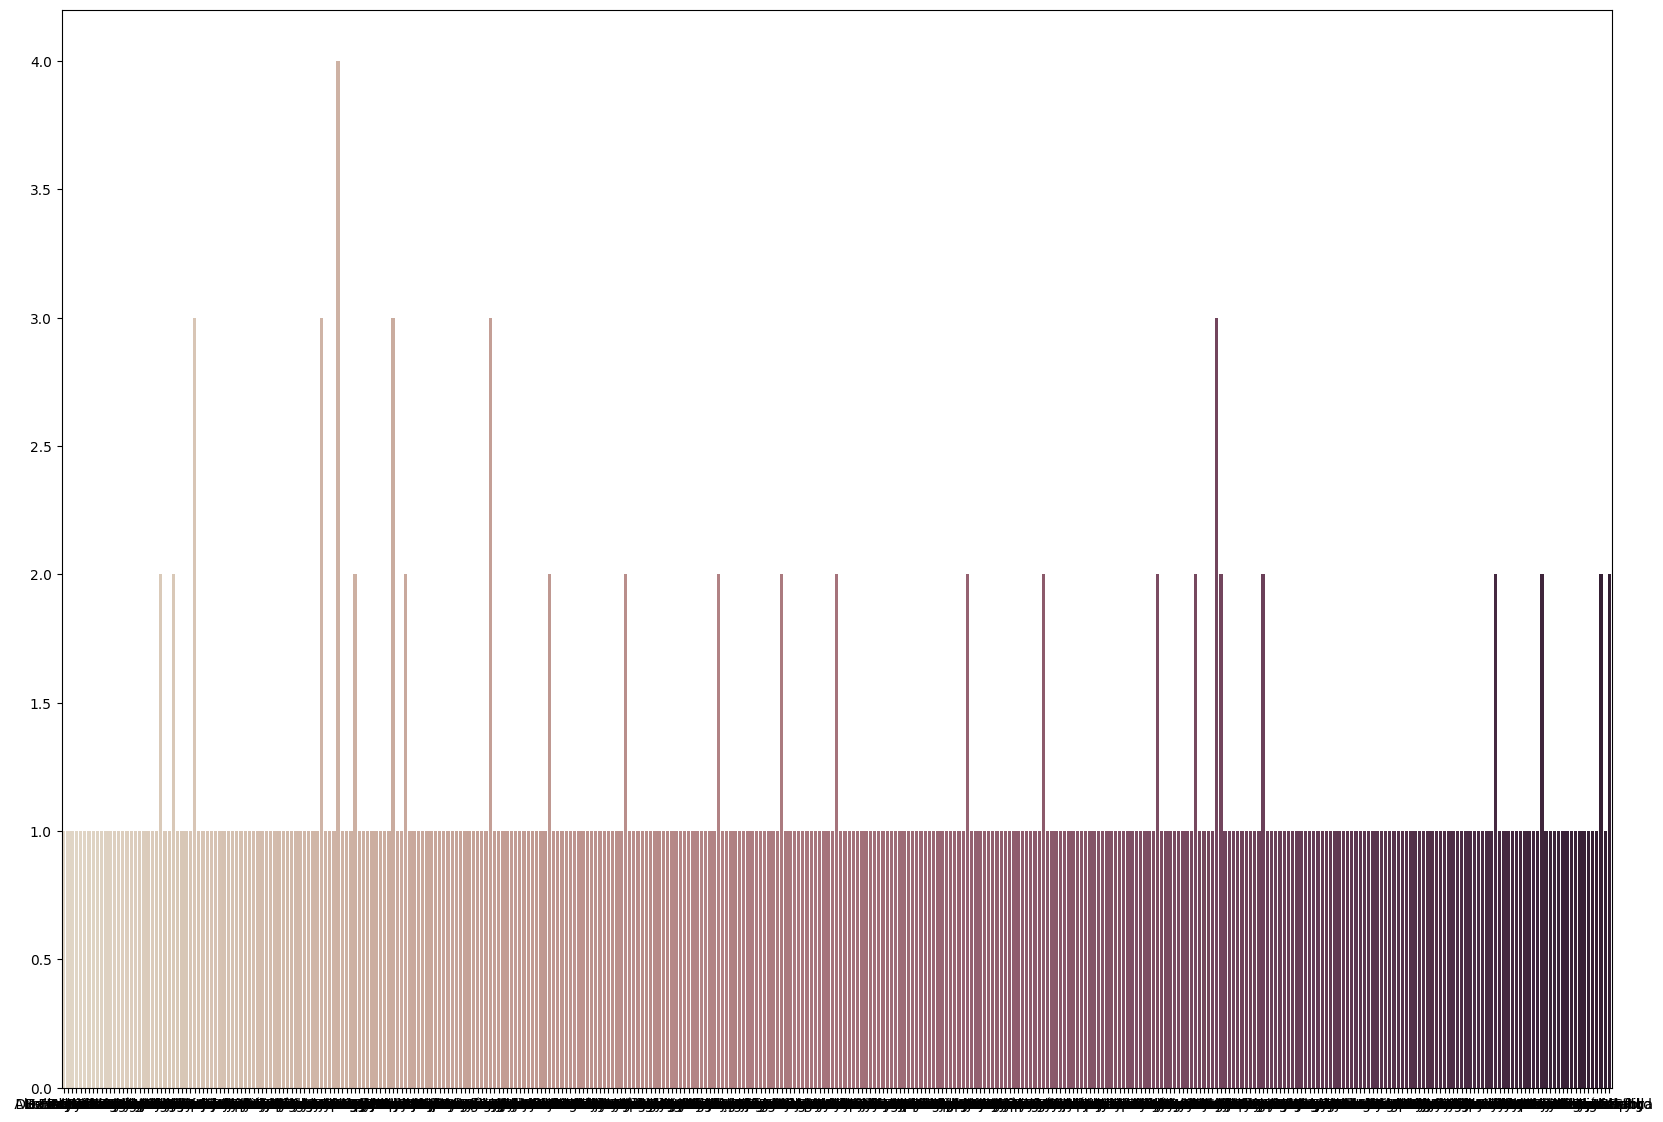

In [224]:
fig = plt.figure(figsize=(20,14))
sns.barplot(x=list(set(l_cast)), y= u_cast_number, palette="ch:.25")
locs, labels = plt.xticks()

In [229]:
up2 = []
for i,j in enumerate(u_cast_number):
    if j >1:
        up2.append(list(set(l_cast))[i])

In [234]:
df['Cast'][0][1]

' Sope Dirisu'

In [237]:
a_top = []
a_title = []

for i,j in enumerate(df['Cast']):
    for t in j:
        if t in up2:
            a_top.append(df['Top'][i])
            a_title.append(df['Movie Title'][i])

In [242]:
b_title = []
for i,j in enumerate(df['Movie Title']):
    if j in list(set(a_title)):
        b_title.append(df['Top'][i])

Counter({'Up to 10': 7, 'Up to 50': 25, 'Up to 100': 25})

In [ ]:
b_title

In [265]:
list(set(a_title))

['The Lord of the Rings: The Fellowship of the Ring',
 'Zombieland',
 'Rango',
 'Hustle',
 'Skyfall',
 "Roald Dahl's Matilda the Musical",
 'Life of Brian',
 'The Little Prince',
 'Hell or High Water',
 'La La Land',
 'When Harry Met Sally...',
 'The Lord of the Rings: The Two Towers',
 'Reservoir Dogs',
 'High Flying Bird',
 'Kung Fu Panda',
 'Zero Dark Thirty',
 'How to Train Your Dragon',
 'Mudbound',
 'Apollo 10 1/2: A Space Age Childhood',
 'The Imitation Game',
 'Monty Python and the Holy Grail',
 'Spider-Man',
 'The Meyerowitz Stories (New and Selected)',
 'Moneyball',
 'The Ballad of Buster Scruggs',
 'Glass Onion: A Knives Out Mystery',
 'Donnie Brasco',
 'Dolemite Is My Name',
 'The Power of the Dog',
 'The Bad Guys',
 'Spider-Man 2',
 'The Lord of the Rings: The Return of the King']

In [274]:
df['Many'] = 0
for i,j in enumerate(df['Movie Title']):
    if j in list(set(a_title)):
        df.loc[i, 'Many'] = 'Freqent Actor'
    else:
        df.loc[i, 'Many'] = 'Ony-once'

In [275]:
df

,Rank,Movie Title,Year,Score,Director,Cast,Critics Consensus,Top,Many
0,1,His House,2020,100,Remi Weekes,"[Wunmi Mosaku, Sope Dirisu, Matt Smith, Cor...",Featuring genuine scares through every corrido...,Up to 10,Ony-once
1,2,How to Train Your Dragon,2010,99,Christopher Sanders,"[Jay Baruchel, Gerard Butler, America Ferrer...","Boasting dazzling animation, a script with sur...",Up to 10,Freqent Actor
2,3,The Forty-Year-Old Version,2020,99,Radha Blank,"[Welker White, Reed Birney, Radha Blank, Pe...",The Forty-Year-Old Version opens a compelling ...,Up to 10,Ony-once
3,4,Under the Shadow,2016,99,Babak Anvari,"[Narges Rashidi, Avin Manshadi, Bobby Naderi...",Under the Shadow deftly blends seemingly dispa...,Up to 10,Ony-once
4,5,Monty Python and the Holy Grail,1975,98,Terry Gilliam,"[Graham Chapman, John Cleese, Terry Gilliam,...",A cult classic as gut-bustingly hilarious as i...,Up to 10,Freqent Actor
...,...,...,...,...,...,...,...,...,...
95,96,Fear Street Part Three: 1666,2021,88,Leigh Janiak,"[Kiana Madeira, Ashley Zukerman, Gillian Jac...",Fear Street Part Three: 1666 sends the slasher...,Up to 100,Ony-once
96,97,Donnie Brasco,1997,88,Mike Newell,"[Al Pacino, Johnny Depp, Michael Madsen, Br...","A stark, nuanced portrait of life in organized...",Up to 100,Freqent Actor
97,98,Inception,2010,87,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, El...","Smart, innovative, and thrilling, Inception is...",Up to 100,Ony-once
98,99,American Beauty,1999,87,Sam Mendes,"[Kevin Spacey, Annette Bening, Thora Birch, ...","Flawlessly cast and brimming with dark, acid w...",Up to 100,Ony-once


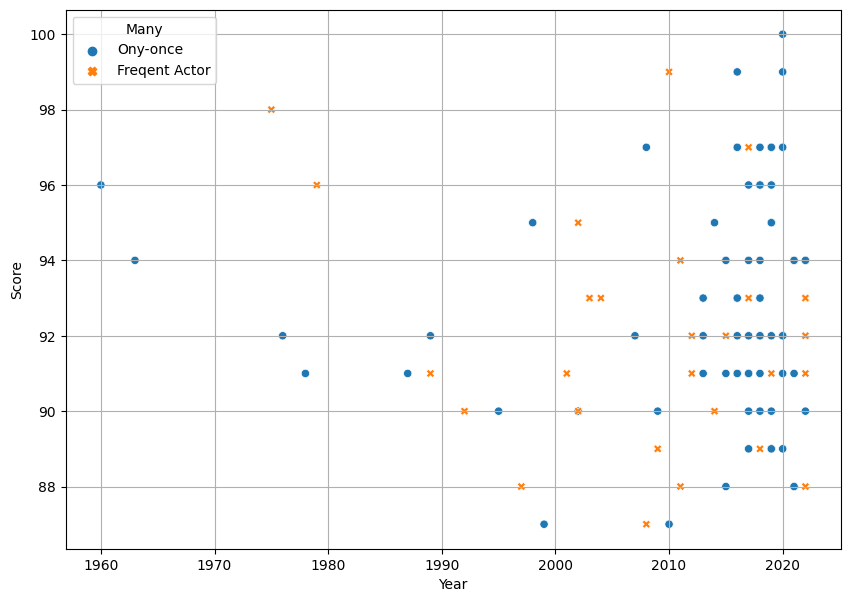

In [279]:
fig = plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='Year', y='Score',hue = 'Many',style = 'Many')
plt.grid()